# Exercises week 38
### Show the rewrite
We write the cost function as 
$$C(\mathbf{X, \beta} = \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right]$$
then we write this out as
$$\mathbb{E}\left[ y^2 - 2y\tilde{y} + \tilde{y}^2 \right]
\\ = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2]
\\ = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2] $$
I will take on these three terms one by one:
$$\mathbb{E}[y^2] = \mathbb{E}[(f+\epsilon)^2]
\\ = \mathbb{E}[f^2 + 2f\epsilon + \epsilon^2]
\\ = \mathbb{E}[f^2] + \mathbb{E}[2f\epsilon] + \mathbb{E}[\epsilon^2]
$$ here we use that $\mathbb{E}[f] = f, \mathbb{E}[\epsilon] = 0, \mathbb{E}[\epsilon^2]=\sigma^2$ since $\epsilon$ is the only random/stochastic variable $\epsilon \sim \mathbb{N}(0, \sigma^2)$.
$$ = f^2 + 2f\mathbb{E}[\epsilon] + \sigma^2
\\ = f^2 + \sigma^2 $$


Then we tackle the next term:
$$ \mathbb{E}[y\tilde{y}] = \mathbb{E}[(f+\epsilon)\tilde{y}]
\\ = \mathbb{E}[f\tilde{y} + \epsilon\tilde{y}]
\\ = \mathbb{E}[f\tilde{y}] + \mathbb{E}[\epsilon\tilde{y}]
\\ = f\mathbb{E}[\tilde{y}] + \mathbb{E}[\epsilon] \mathbb{E}[\tilde{y}]
\\ = f\mathbb{E}[\tilde{y}]
$$
then the third and final term:
$$ \mathbb{E}[\tilde{y}^2] = var[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2 $$
where we have used the definition of variance $var(x) = \mathbb{E}[x^2] - (\mathbb{E}[x])^2$. We now put these three terms into our cost function expression:
$$ C(\mathbf{X, \beta} = \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right] = \mathbb{E}[y^2] - 2\mathbb{E}[y\tilde{y}] + \mathbb{E}[\tilde{y}^2]
\\ = f^2 + \sigma^2 - 2f\mathbb{E}[\tilde{y}] + var[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2 
\\ = (f^2 - 2f\mathbb{E}[\tilde{y}] + (\mathbb{E}[\tilde{y}])^2) + \sigma^2 + var[\tilde{y}]
\\ = (f - \mathbb{E}[\tilde{y}])^2 + var[\tilde{y}] + \sigma^2 
\\ \simeq (y - \mathbb{E}[\tilde{y}])^2 + var[\tilde{y}] + \sigma^2 
\\ = (Bias[\tilde{y}])^2 +  var[\tilde{y}] + \sigma^2 
$$
where we can write out the variance as 
$$ var[\tilde{y}] = \frac{1}{N} \sum_{i=0}^{N-1} (\tilde{y}_i - \mathbb{E}[\tilde{y}])^2 $$
such that we have now shown that 
$$ \mathbb{E}\left[ (\mathbf{y-\tilde{y}})^2 \right] = (Bias[\tilde{y}])^2 +  var[\tilde{y}] + \sigma^2 $$

The bias term means the model's systematic bias (or the model's mean value's error) from the ideal. For example this could mean that all our model's data points/the model's mean value have a shift from the ideal of a some constant $C$ like $|y - \tilde{y}| = C$. A big bias means a bigger drift and error from the ideal, and therefore a low bias is what we want.

The variance term is our model's variance from the mean value. A high variance means a bigger spread of the model data points around the mean/expectation value, and a low variance means a smaller spread which is what we want.

### 1D Bias-variance analysis with OLS
Below I plot test MSE, bias, and variance for different polynomial degrees with OLS:

$\mathbf{NB:}$ this exercise part I could not get the plots to be correct. I even got help by the teacher and teacher assistants, where they told me to email them my code so they could look at it some more later and come back to me, but I have not recieved any response, so below is the code I think is correct but with incorrect plot values.

Text(0, 0.5, 'Value')

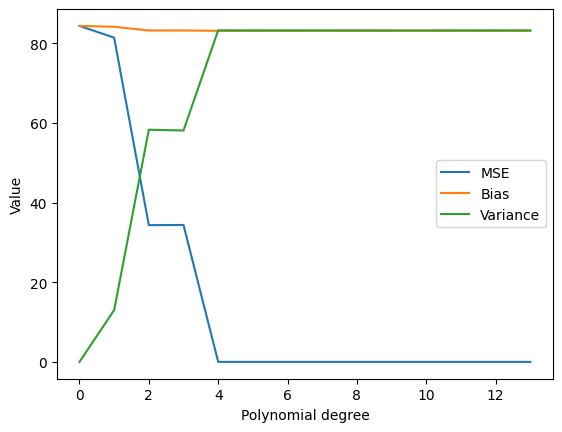

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# PARAMETERS
n = 1000  # no. data points
maxdegree = 14  # no. of polynomial degrees

# Create data set
np.random.seed(2023)
x = np.linspace(-3, 3, n).reshape(-1, 1)
# y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
y = x**4 - 5*x**2 + 2*x +  np.random.normal(0, 0.1, x.shape)

# Create arrays
degrees = np.arange(0, maxdegree, 1)
mse_arr = np.zeros(maxdegree)
bias_arr = np.zeros_like(mse_arr)
variance_arr = np.zeros_like(mse_arr)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
for degree in degrees:
    # Create model
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    
    # Create prediction
    y_predict = model.fit(x_train, y_train).predict(x_test)
    
    # Calculate values
    mse_arr[degree] = np.mean((y_test - y_predict)**2)
    bias_arr[degree] = np.mean((y_test - np.mean(y_predict))**2)
    variance_arr[degree] = np.var(y_predict)

# Plotting
plt.plot(degrees, mse_arr, label="MSE")
plt.plot(degrees, bias_arr, label="Bias")
plt.plot(degrees, variance_arr, label="Variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Value")

NB: KOMMENTER AT MSE SKAL VÆRE OMTRENT LIK SUMMEN AV BIAS OG VARIANSE (formelen vi viste i opgv 1)

### Bias-variance-tradeoff of OLS using bootstrap resampling
Below I first plot the test mse, bias, and variance for OLS using bootstrap. Firstly I plot as a function of polynomial degree (model complexity), then as a function of number of data points.

Function of polynomial degree:

Minimum error (0.0173558) at degree=8


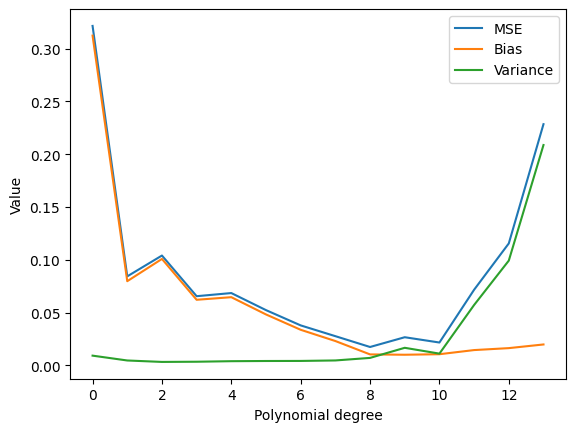

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# PARAMETERS
n = 40  # no. data points
maxdegree = 14  # no. of polynomial degrees
n_bootstrap = 100  # no. of bootstrap resamples

# Create data set
"""This data set is identical to the one from the lecture notes https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff
because i could not replicate the results with another data set and parameters..."""
np.random.seed(2018)
x = np.linspace(-3, 3, n).reshape(-1, 1)
noise = np.random.normal(0, 0.1, x.shape)
f = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)
y = f + noise

# Create arrays
degrees = np.arange(0, maxdegree, 1)
mse_arr = np.zeros(maxdegree)
bias_arr = np.zeros_like(mse_arr)
variance_arr = np.zeros_like(mse_arr)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
for degree in degrees:
    # Create model
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    
    # Resample with bootstrap
    y_predict = np.empty((y_test.shape[0], n_bootstrap))
    for i in range(n_bootstrap):
        x_, y_ = resample(x_train, y_train)
        # Create prediction for each resample
        y_predict[:, i] = model.fit(x_, y_).predict(x_test).ravel()
    
    # Calculate values
    mse_arr[degree] = np.mean( np.mean((y_test - y_predict)**2, axis=1, keepdims=True) )
    bias_arr[degree] = np.mean( (y_test - np.mean(y_predict, axis=1, keepdims=True))**2 )
    variance_arr[degree] = np.mean( np.var(y_predict, axis=1, keepdims=True) )

# Plotting
plt.plot(degrees, mse_arr, label="MSE")
plt.plot(degrees, bias_arr, label="Bias")
plt.plot(degrees, variance_arr, label="Variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("Value")

print(f"Minimum error ({np.min(mse_arr):g}) at degree={degrees[np.argmin(mse_arr)]}")

As a function of number of data points, with polynomial degree 8: